In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
url = 'https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find_all('table')

df_biler = pd.read_html(str(table))[0]

df_biler = df_biler.rename(columns={'Modell (temp. varierte fra 0° til -10°)': 'Modell'})

df_biler = df_biler[df_biler["STOPP"].str.contains("x")==False]

df_biler[['km', 'kWh']] = df_biler['WLTP-tall'].str.split('/', expand = True)

df_biler = df_biler.filter(['Modell', 'STOPP', 'km'], axis=1)

df_biler['km'] = df_biler['km'].str.replace(r'km', '')
df_biler['STOPP'] = df_biler['STOPP'].str.replace(r'km', '')

df_biler = df_biler.astype({'STOPP':'int', 'km':'int'})

In [3]:
df_biler

,Modell,STOPP,km
0,Tesla Model 3 LR Dual motor,521,614
1,Mercedes-Benz EQS 580 4matic,513,645
2,BMW iX xDrive50,503,591
3,Tesla Model Y LR Dual motor,451,507
4,Volkswagen ID.3 PRO S,435,539
5,Kia EV6 2WD,429,528
6,NIO ES8 LR 7-seter,425,488
7,Kia EV6 4WD,423,484
8,Volkswagen ID.4 Pro,414,485
9,Hyundai Ioniq 5 2WD,408,481


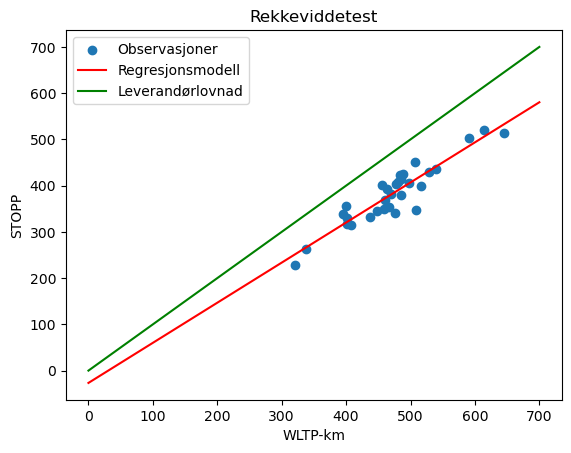

In [4]:
fig, ax = plt.subplots()

x = np.linspace(0, 700, 100)
y = x

ax.scatter(df_biler['km'], df_biler['STOPP'], label='Observasjoner')

a, b = np.polyfit(df_biler['km'], df_biler['STOPP'], 1)
ax.plot(x, a*x+b, color='red', label='Regresjonsmodell')
ax.plot(x, y, color='green', label='Leverandørlovnad')

ax.set_xlabel('WLTP-km')
ax.set_ylabel('STOPP')
ax.set_title('Rekkeviddetest')
ax.legend(loc='best')